Go to directory: /Users/yunjunz/development/python/2019_RSE_PYSAR/sim_weightFunc


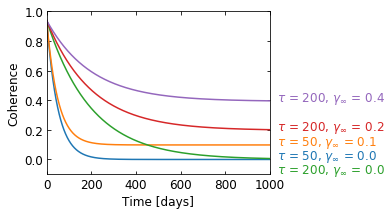

In [2]:
## Figure S14 - Decorrelation Model used to Simulate Spatial Coherence
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import sensor
from pysar.utils import readfile, utils as ut, network as pnet, plot as pp
from pysar.simulation.plot import *

work_dir = os.path.expandvars('$PNOTE/sim_weightFunc')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

ts_file = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/timeseries.h5')
sensor_name = sensor.project_name2sensor_name(ts_file)[0]
atr = readfile.read_attribute(ts_file)
pbase = 100  # m
tbase = np.linspace(0,1000, num=1000)

# Thermal decorrelation (Zebker and Villasenor, 1992, Eq.4)
SNR = sensor.signal2noise_ratio(sensor_name)
coh_thermal = 1. / (1. + 1./SNR)

# Geometric decorrelation (Hanssen, 2001, Eq. 4.4.12)
inc_angle = ut.incidence_angle(atr, dimension=0, print_msg=False)
pbase_c = pnet.critical_perp_baseline(sensor_name, inc_angle)
coh_geom = max((pbase_c - abs(pbase)) / pbase_c, 0.)

## Plot
fig, ax = plt.subplots(figsize=[4, 3])
for i, (coh_resid, decor_time) in enumerate(zip([0.0, 0.1, 0.0, 0.2, 0.4],
                                                [50,  50,  200, 200, 200])):
    # Exponential decorrelation model (Parizzi et al., 2009; Morishita and Hanssen, 2015)
    coh_temp = np.multiply((coh_thermal - coh_resid), np.exp(-1*abs(tbase)/decor_time)) + coh_resid
    coh = coh_geom * coh_temp

    label = r'$\tau$ = {}, $\gamma_\infty$ = {}'.format(decor_time, coh_resid)
    ax.plot(tbase, coh, label=label)
    # label
    if i == 2:
        y = coh[-1] - 0.1
    else:
        y = coh[-1]
    ax.annotate(label, xy=(1.03, y),
                xycoords=ax.get_yaxis_transform(),  # y in data untis, x in axes fraction
                color=pp.mplColors[i], fontsize=font_size)
plt.ylim([-0.1, 1])
plt.xlim([min(tbase), max(tbase)])
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
plt.xlabel('Time [days]', fontsize=font_size)
plt.ylabel('Coherence', fontsize=font_size)

# save
out_file = 'decorrelation_model.jpg'
#plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()